In [1]:
%matplotlib inline
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyemu

setting random seed


In [2]:
sc = pyemu.Schur("freyberg_zones.jcb")

In [3]:
sc.get_parameter_summary()

,percent_reduction,post_var,prior_var
rch1,98.446073,0.000083,0.005355
hk1,0.021515,0.203849,0.203893
hk2,79.944547,0.040892,0.203893
hk3,90.874408,0.018606,0.203893
hk4,35.177035,0.132169,0.203893
hk5,86.185185,0.028167,0.203893
hk6,52.838348,0.096159,0.203893


In [4]:
sc.get_forecast_summary()

,percent_reduction,post_var,prior_var
rivflux_fore,97.880491,7.056393e+03,3.329259e+05
fr04c9,96.397817,3.968533e-01,1.101702e+01
travel_time,89.720616,2.693531e+08,2.620324e+09
fr03c16,95.921186,9.157233e-03,2.245073e-01


# Parameter by parameter, fix the parameter and see the impact on forecast uncertainty (simulating perfect knowledge of the parameter)

In [8]:
sc_par_contribution = sc.get_par_contribution()
sc_par_contribution.drop('percent_reduce', axis=1, level=1)

fr03c16              fr04c9            rivflux_fore                 \
          post     prior      post      prior         post          prior   
base  0.009157  0.224507  0.396853  11.017022  7056.393154  332925.864164   
hk5   0.009130  0.224505  0.376857  10.991726  6588.516715  326736.326271   
hk2   0.006076  0.213211  0.277628  10.776299  5662.800549  331973.529450   
hk6   0.009156  0.224507  0.394804  11.013195  6908.163860  332613.995736   
hk1   0.009157  0.224507  0.396833  11.016989  7055.795103  332925.712531   
rch1  0.009105  0.215500  0.368224  10.550824  6175.965748   57525.761776   
hk3   0.000816  0.020526  0.191083   1.280122  6429.606711  290747.304643   
hk4   0.006807  0.224288  0.383044  10.472974  6052.594843  325032.554578   

       travel_time                
              post         prior  
base  2.693531e+08  2.620324e+09  
hk5   8.897502e+06  3.621307e+07  
hk2   2.677261e+08  2.620107e+09  
hk6   2.000371e+08  2.585408e+09  
hk1   2.693357e+08  2.620323e+09  
rch1  2.298257e+08  2.620324e+09  
hk3   2.673276e+08  2.619387e+09  
hk4   2.036825e+08  2.620180e+09

# We can see how much worse forecasts get without an observation (flipping that around, how valuable is each observation to the forecasts)

In [32]:
sc_removed_import = sc.get_removed_obs_importance()
sc_removed_import_scaled = sc_removed_import.copy()
sc_removed_import

,fr03c16,fr04c9,rivflux_fore,travel_time
base,0.009157,0.396853,7056.393154,2.693531e+08
cr27c7,0.009860,0.399755,7056.394851,2.883563e+08
cr22c11,0.009257,0.402741,7095.944555,3.402599e+08
cr14c11,0.009682,0.398410,7238.982864,2.800667e+08
cr23c16,0.009249,0.396923,7077.313213,2.694043e+08
cr25c5,0.009969,0.445024,7339.722781,2.868376e+08
cr35c11,0.009159,0.397364,7057.207109,3.276519e+08
cr04c9,0.012781,0.676052,9303.177307,2.804126e+08
cr10c2,0.015227,0.447922,8938.611681,2.695764e+08
cr16c17,0.009163,0.398783,7102.967568,2.705760e+08


In [33]:
# let's scale this
for cc in sc_removed_import.columns:
    sc_removed_import_scaled[cc]  =  100*(sc_removed_import_scaled[cc]-sc_removed_import_scaled[cc].loc['base'])/ \
        sc_removed_import_scaled[cc].loc['base']

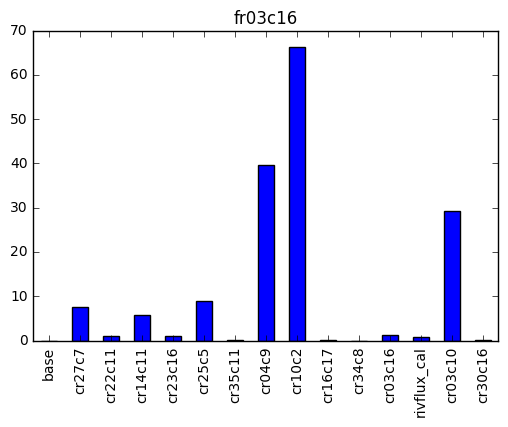

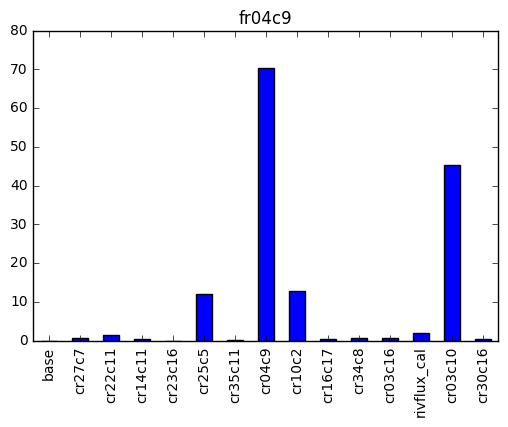

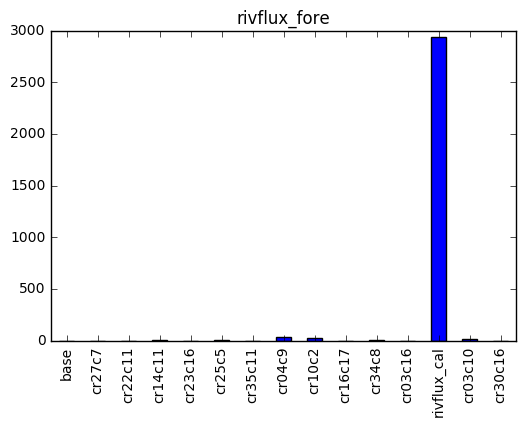

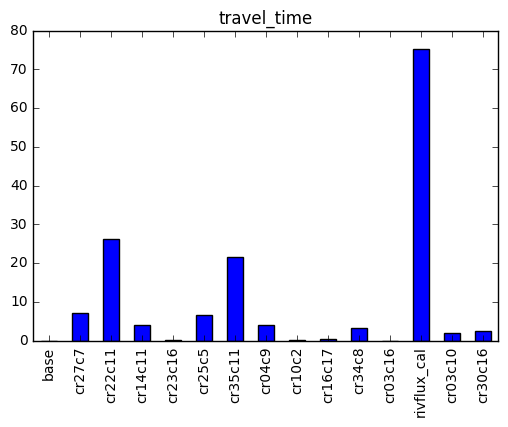

In [34]:
for cc in sc_removed_import_scaled.columns:
    plt.figure()
    sc_removed_import_scaled[cc].plot(kind='bar')
    plt.title(cc)

In [7]:
sc = pyemu.Schur(jco="freyberg_zones_burn_potobs.jcb")
sc.get_forecast_summary()

,percent_reduction,post_var,prior_var
travel_time,95.617618,1.863426e+07,4.252084e+08
fr04c9,98.840517,2.677393e-01,2.309126e+01
rivflux_cal,99.181221,5.354725e+05,6.539888e+07
rivflux_fore,99.095691,6.524353e+05,7.214737e+07
fr03c16,95.620829,1.113010e-01,2.541598e+00


In [8]:
obs = sc.pst.observation_data
pobs_names = list(obs.loc[obs.obgnme=="potobs","obsnme"])

In [9]:
df = sc.get_added_obs_importance(obslist_dict={oname:oname for oname in pobs_names},
                                base_obslist=sc.pst.nnz_obs_names,reset_zero_weight=True)

In [10]:
df.min()

fr03c16         7.782289e-02
fr04c9          1.914942e-01
rivflux_cal     3.631618e+05
rivflux_fore    4.097393e+05
travel_time     1.110639e+07
dtype: float64

In [11]:
df.max()

fr03c16         1.113010e-01
fr04c9          2.677393e-01
rivflux_cal     5.354725e+05
rivflux_fore    6.524353e+05
travel_time     1.863426e+07
dtype: float64

In [12]:
df1 = sc.get_added_obs_importance(obslist_dict={oname:oname for oname in pobs_names},reset_zero_weight=True)

In [13]:
df1.min()

fr03c16         3.870210e-01
fr04c9          7.612547e-01
rivflux_cal     1.358025e+06
rivflux_fore    1.320361e+06
travel_time     9.888478e+07
dtype: float64

In [14]:
df1.max()

fr03c16         2.541598e+00
fr04c9          2.309126e+01
rivflux_cal     6.539888e+07
rivflux_fore    7.214737e+07
travel_time     4.252084e+08
dtype: float64

In [24]:
def plot_added_worth(df):
    df_base = df.loc["base",:]
    df_frac = 100.0 * (1.0 - (df / df_base))
    df_frac = df_frac.loc[pobs_names,:]
    df_frac.loc[:,"row"] = df_frac.index.map(lambda x: int(x[2:4]))
    df_frac.loc[:,"column"] = df_frac.index.map(lambda x: int(x[-2:]))

    for forecast in df_frac.columns:
        if forecast in ["row","column"]:
            continue
        arr = np.zeros((df_frac.row.max(),df_frac.column.max())) - 1.0
        for r,c,f in zip(df_frac.row,df_frac.column,df_frac.loc[:,forecast]):
            arr[r-1,c-1] = f
        arr = np.ma.masked_where(arr < 0,arr)
        fig = plt.figure(figsize=(6,10))
        ax = plt.subplot(111)
        c = ax.imshow(arr,interpolation="nearest",alpha=0.5)
        #ax.imshow(zn_arr,interpolation="nearest",alpha=0.5)
        plt.colorbar(c)
        ax.set_title(forecast)
        plt.show()

    

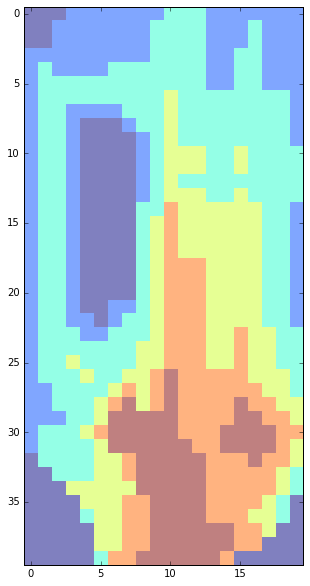

In [21]:
zn_arr = np.loadtxt("hk.zones")
fig = plt.figure(figsize=(6,10))
ax = plt.subplot(111)
c = ax.imshow(zn_arr,interpolation="nearest",alpha=0.5)
plt.show()

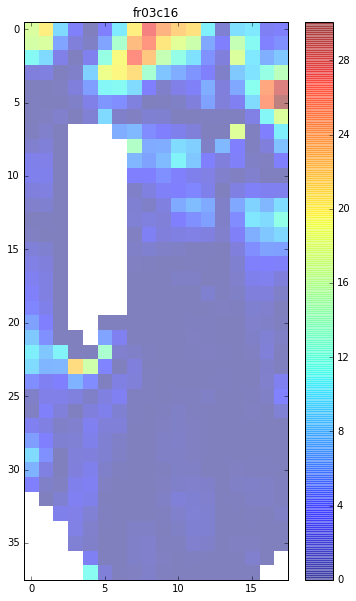

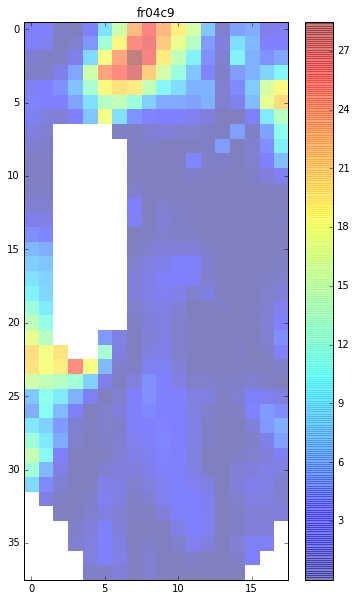

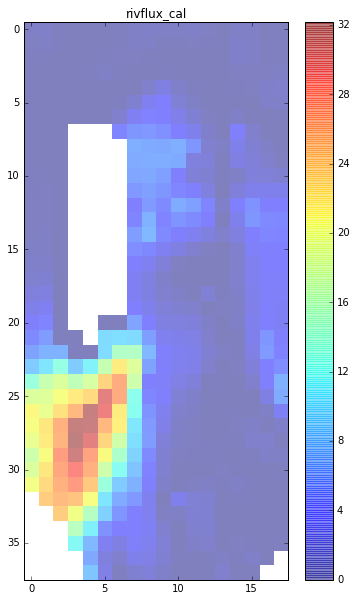

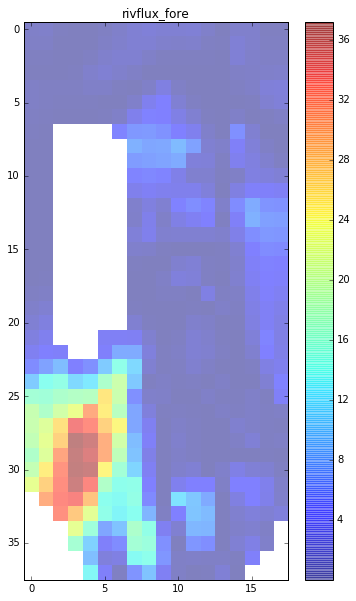

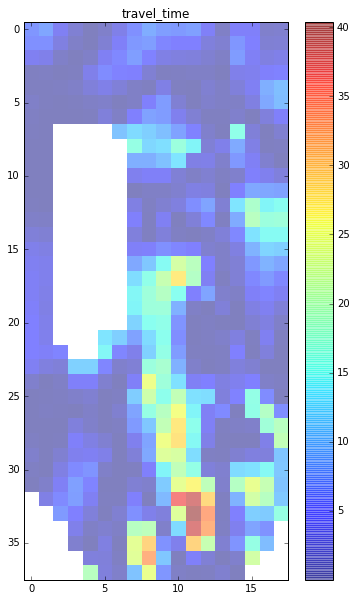

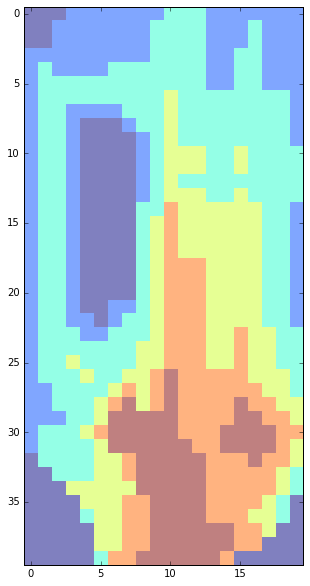

In [16]:
plot_added_worth(df)

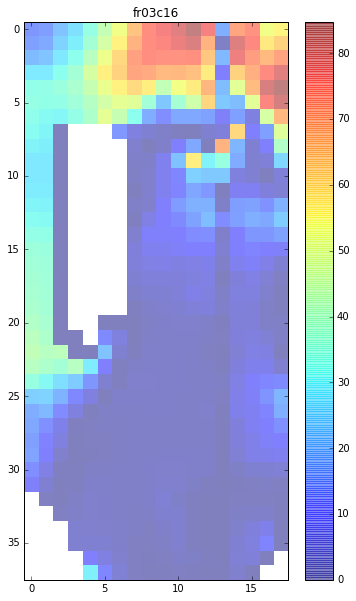

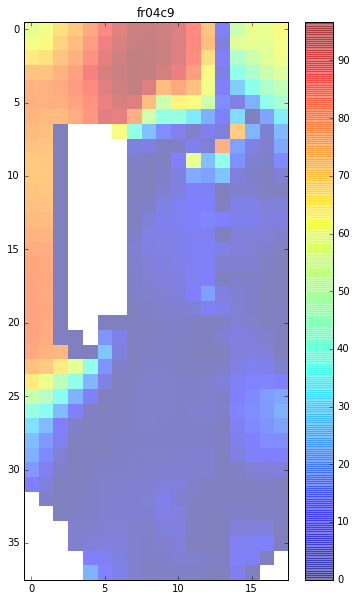

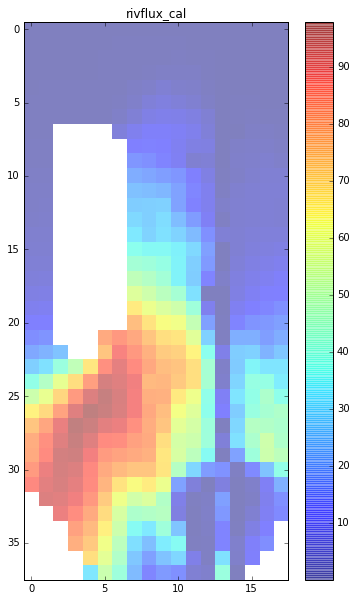

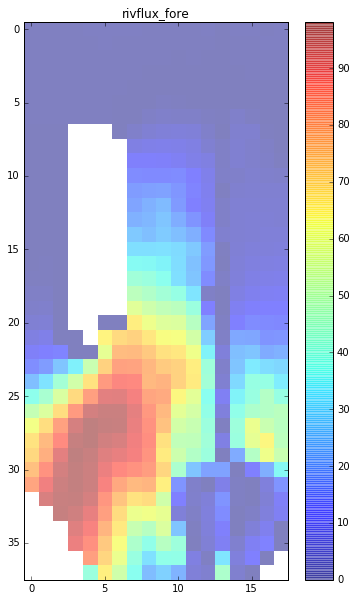

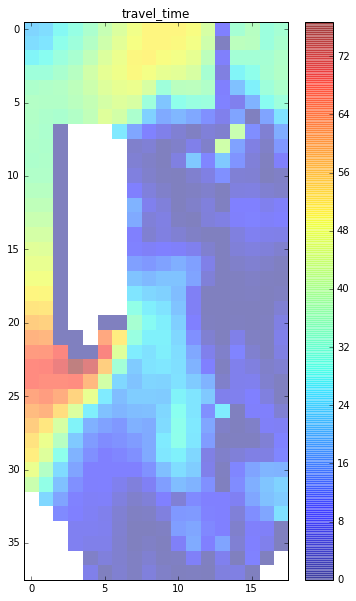

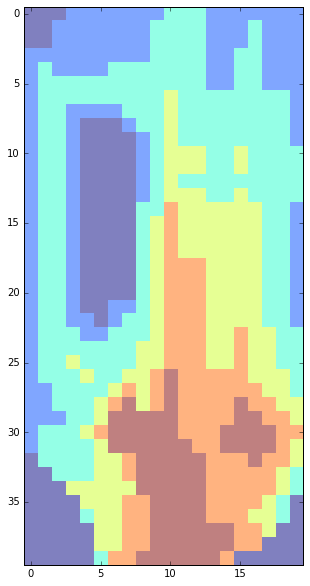

In [17]:
plot_added_worth(df1)

In [18]:
pst = pyemu.Pst("freyberg_zones_potobs.pst")
pst.template_files[1] = "hk.ref.tpl.alt"
pst.template_files
pst.control_data.noptmax = -1
pst.write("freyberg_zones_alt.pst")
os.system("pestpp freyberg_zones_alt.pst")

0

In [19]:
sc = pyemu.Schur(jco="freyberg_zones_alt.jcb")
df = sc.get_added_obs_importance(obslist_dict={oname:oname for oname in pobs_names},reset_zero_weight=True)

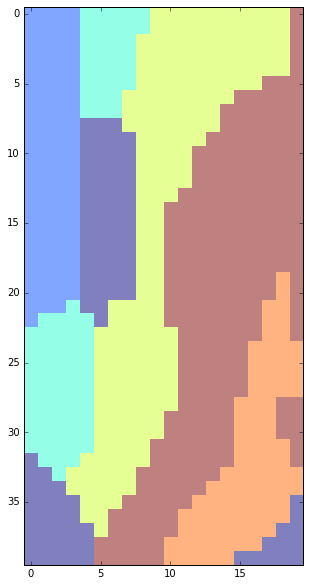

In [22]:
zn_arr = np.loadtxt("kzone.ref.alt")
fig = plt.figure(figsize=(6,10))
ax = plt.subplot(111)
c = ax.imshow(zn_arr,interpolation="nearest",alpha=0.5)
plt.show()

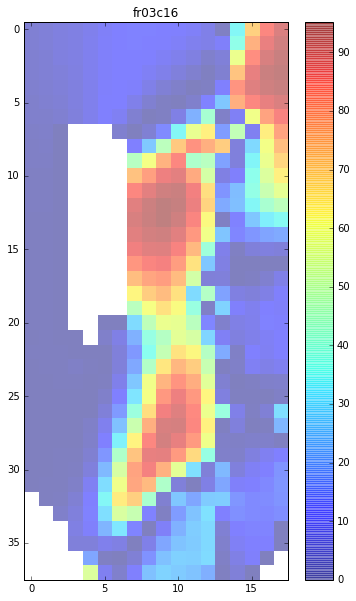

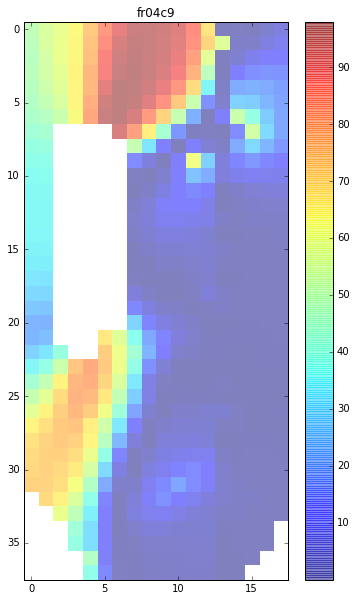

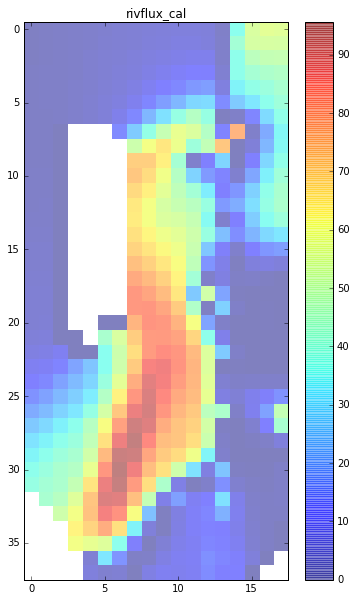

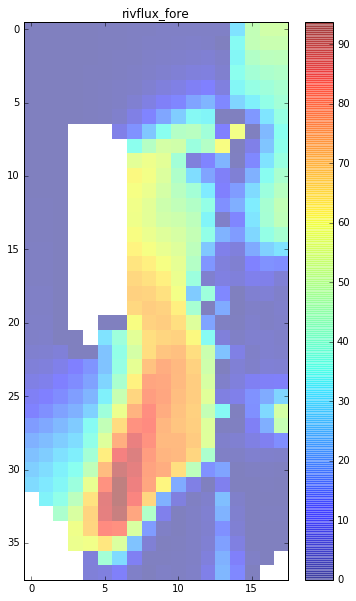

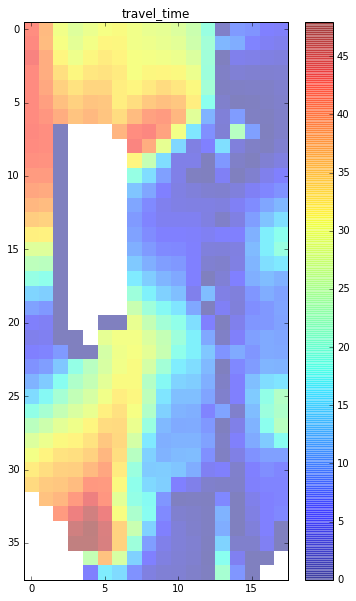

In [25]:
plot_added_worth(df)